# FeS Example Workflow 

This notebook contains a modified version of the first task of the XAS processing workflow.  

The break up of the task consist of the following steps 

| Task                          | Input                                         | Output
| -------------                 |-------------                                  | -----  
| Create Athena project         |                                               | 
| 1. Import data                |File: fes2_rt01_mar02.xmu                      | 
| 2. Normalisation              |Parameters: Pre-edge range = -117.00 to 30.000 |
| 3. Save Athena Project        |                                               |File: FeS2_01.prj


For more details about larch, see https://xraypy.github.io/xraylarch/xafs/


## Libraries
The next cell shows the libraries needed for performning task 1

In [3]:
# Library with the functions that rplicate those provided by athena
# normalisation, merging, re-binning, LCF
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

# File handling
from pathlib import Path

#plotting library
%matplotlib inline
import matplotlib.pyplot as plt

#library for writing to log
import logging

## Custom Functions
The athenamgr library contains the functions (methods) for wrapping the larch functions required for processing XAS files.
- **set_logger** intialises the logging. 
- **get_files_list** returns a list of files in the directory matching the given file pattern.
- **fit_pre_post_edge** crates the pre-edge and postedge fits for mu.
- **plot_mu** shows the plot of mu in energy
- **plot_edge_fit** shows the plot of normalised data
- **plot_normalised** shows the plot of normalised data

## Input parameters (variables)
The variables in the next cell are the processing values that indicate where to get the data from, the pattern of the files to process and the number of files to process. These can be changed to process different datasets.

## Column and group names.

Knowing the elements of the input data set it is possible to start manipulating and visualising the XAFS data. 

In this case energy and $\mu$ are provided, but the names of the columns do not match the names used by Larch. 

We rename the columns. The name of the groups is the same as the name of the file. To make things easier we can also adjust the file name.


In [7]:
# variables that can be changed to process different datasets
data_path = "./"

file_name_pattern = "*.xmu"
f_prefix = "FeS2"
column_labels = "energy mu i0"

top_count = 40
show_graph = True # False to prevent showing graphs

## Main function
The code in the cell below performs the bulk of the processing for task 1. It calls the functions defined above and uses the input parameters.

[root] INFO : Started processing
[root] INFO : project path: FeS2\FeS2000000.prj
[root] INFO : Processing: fes2_rt01_mar02.xmu
[root] INFO : Path: fes2_rt01_mar02.xmu


Log will be saved to: FeS2\process.log


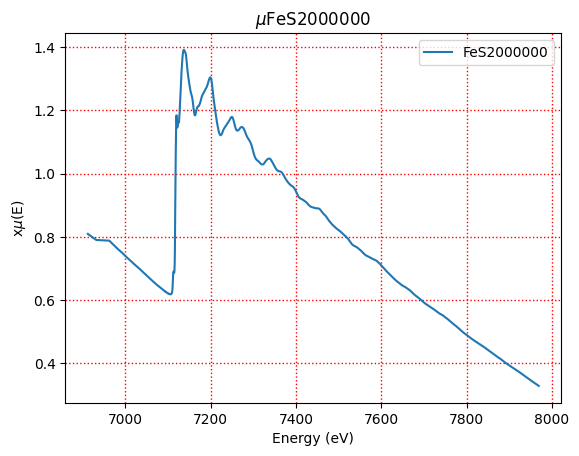

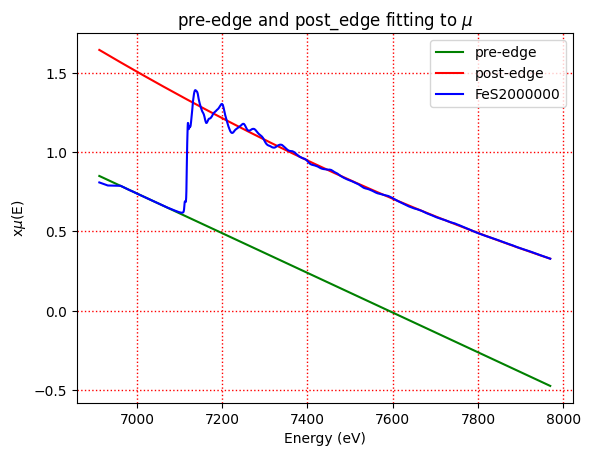

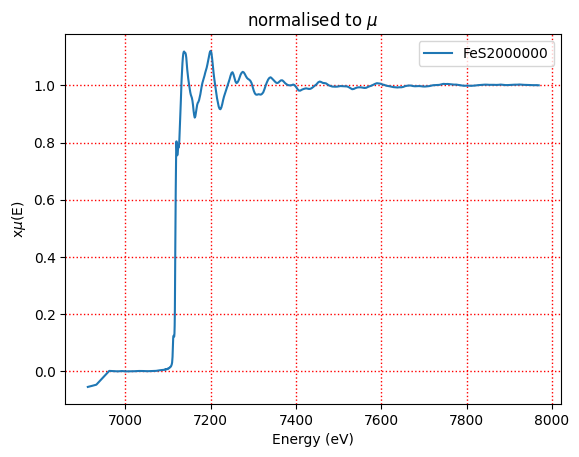

[root] INFO : Finished processing


In [13]:
# start processing createa an output dir and sets the logger

def initial_setup(out_prefix, in_path):
    # create the path for storing results
    out_path = Path("./" , out_prefix)
    Path(out_path).mkdir(parents=True, exist_ok=True)


    # set path for log
    log_file = Path("./",out_path,"process.log")
    print("Log will be saved to:", log_file)

    athenamgr.set_logger(log_file)

    source_path = Path(in_path)
    return source_path, out_path

source_path, out_path =initial_setup(f_prefix, data_path)    
files_list = athenamgr.get_files_list(source_path, file_name_pattern)
xas_data = {}
    
# counter for break
i_count = 0
for a_file in files_list:
    file_name = a_file.name
    

    f_suffix = str(i_count).zfill(6) 
    p_name = f_prefix+f_suffix
    p_path = Path(out_path , p_name + ".prj")
    logging.info ("project path: "+ str(p_path))
    xas_data = athenamgr.read_text(a_file, column_labels)
    # using vars(fe_xas) we see that the object has the following properties: 
    # path, filename, header, data, attrs, energy, xmu, i0
    # print(vars(xas_data))

    # rename columns and group
    #xas_data = rename_cols(xas_data)
    # the group is the same as the file name
    xas_data.filename = p_name
    
    # calculate pre-edge and post edge and add them to group
    # using defaults
    xas_data = athenamgr.fit_pre_post_edge(xas_data, -117, 30)
    
    # Show graph if needed
    if show_graph:
        plt = athenamgr.plot_mu(xas_data)
        plt.show()
        plt = athenamgr.plot_edge_fit(xas_data)
        plt.show()
        plt = athenamgr.plot_normalised(xas_data)
        plt.show()
        
    athenamgr.save_athena(xas_data, p_path)
    
    i_count +=1
    if i_count == top_count:
        break
       
logging.info("Finished processing")